# Multiple Linear Regression on Boston data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [2]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
data=features

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
X=data
Y=targets

In [8]:
X.shape

(506, 13)

In [9]:
Y.shape

(506,)

In [10]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

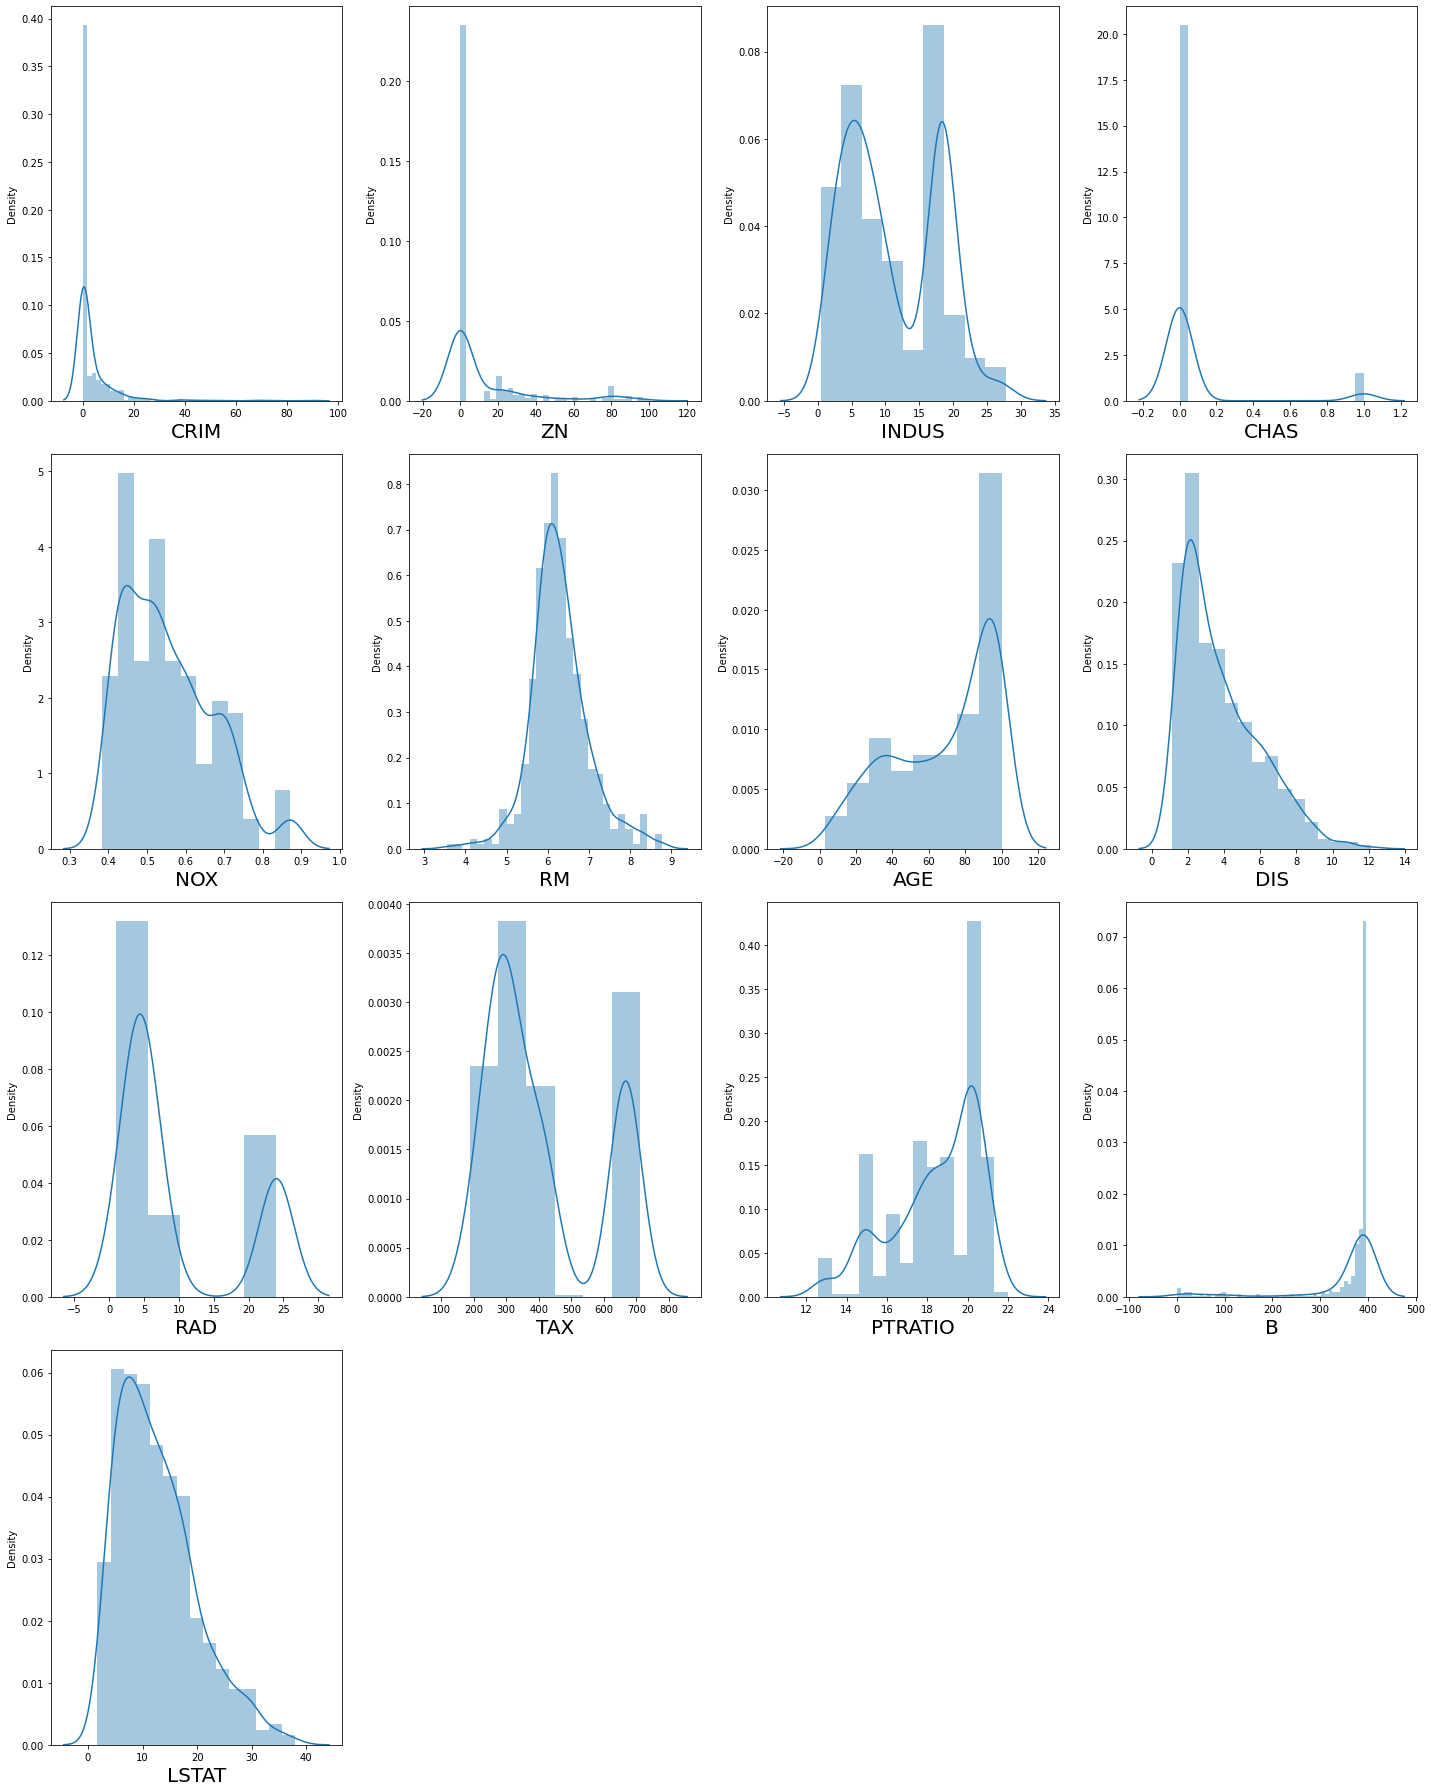

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X  [column],Y) #plotting 
        plt.xlabel(column,fontsize=20) #label 
        
    plotnumber+=1
plt.tight_layout()

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

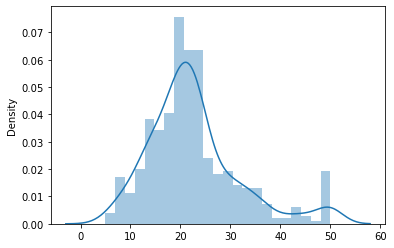

In [77]:
sns.distplot(targets)

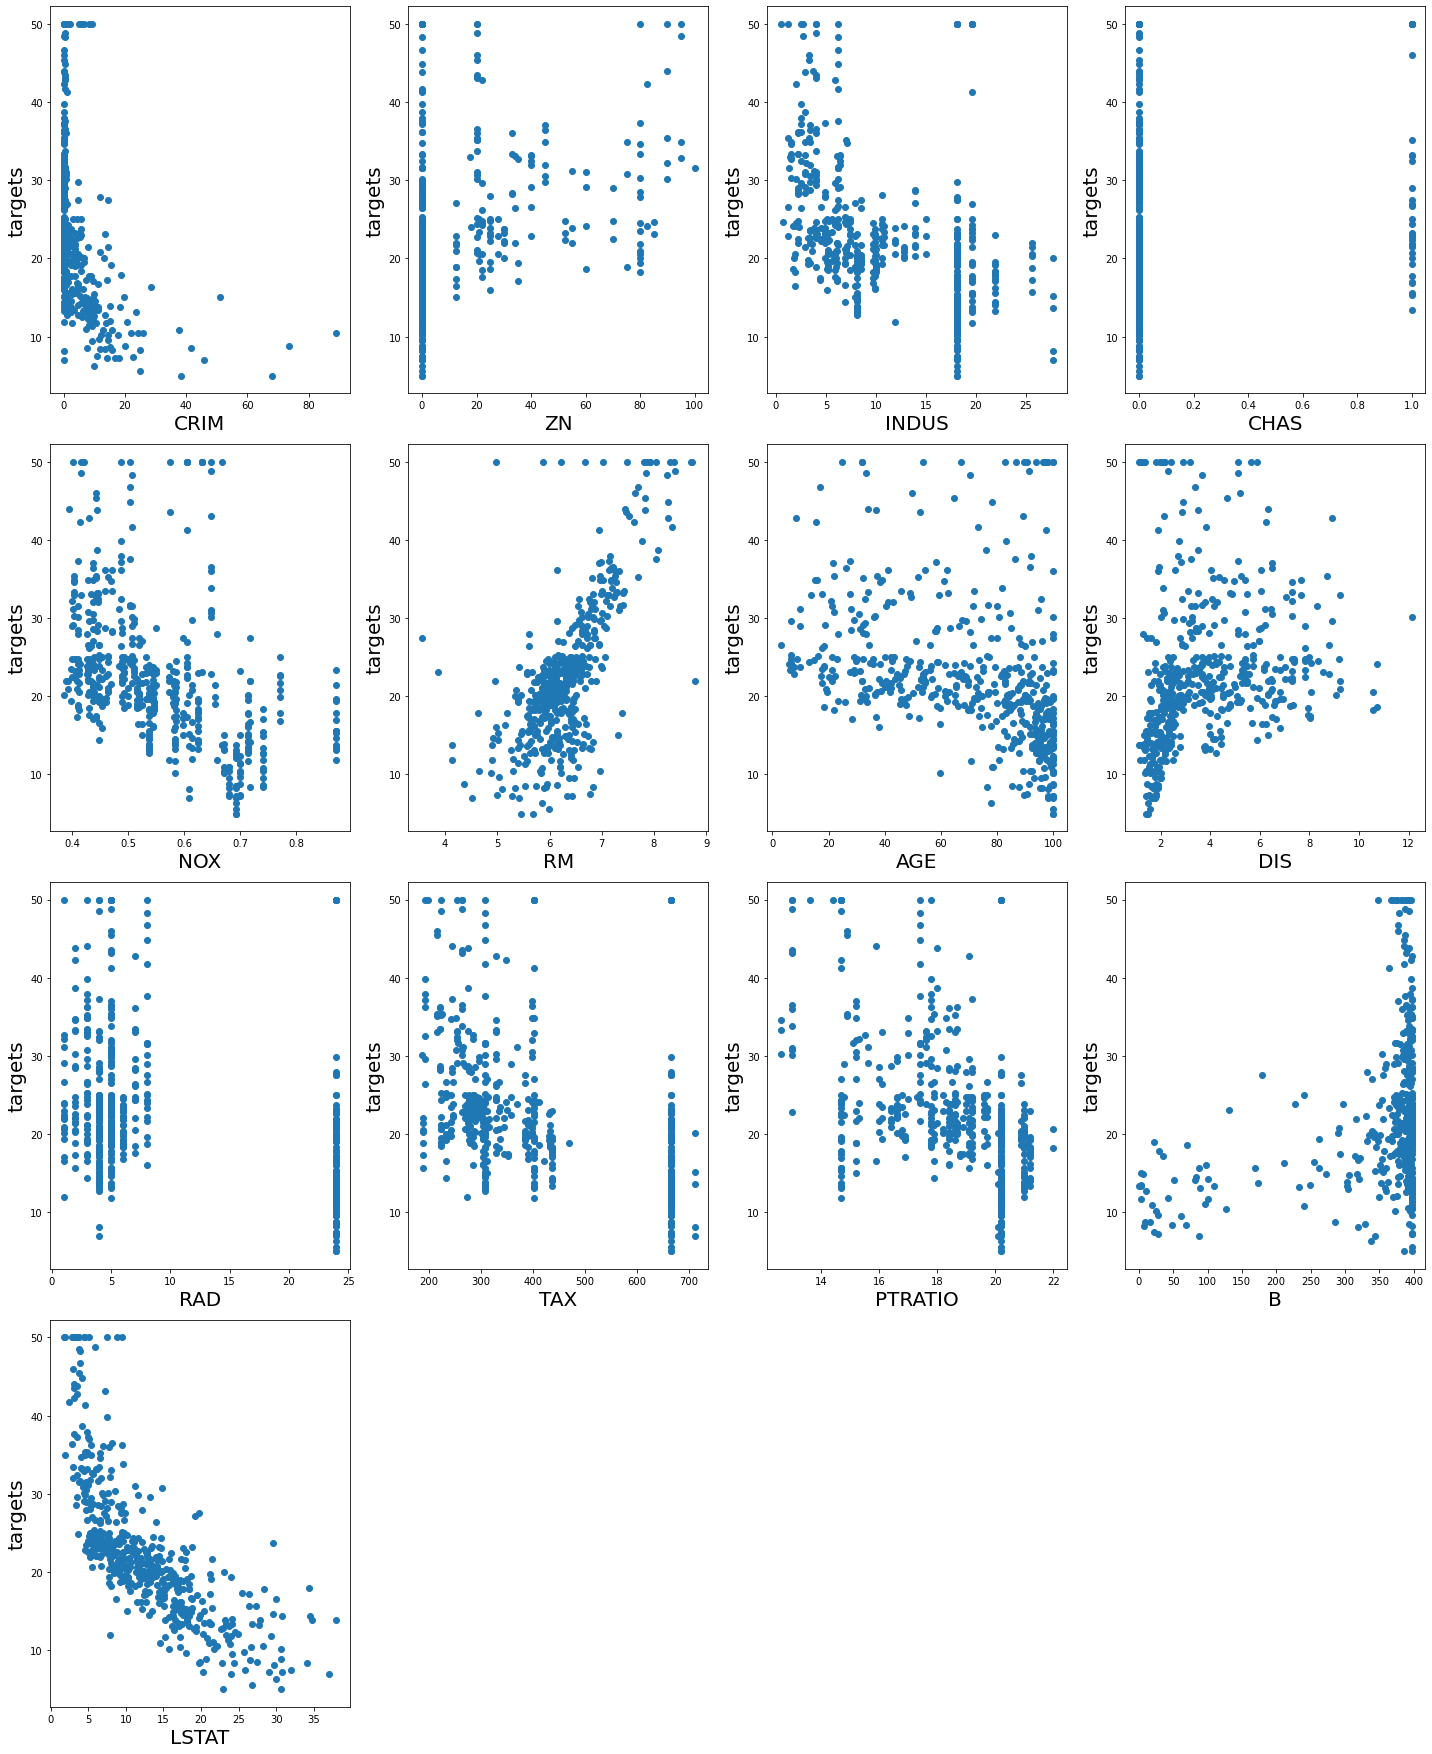

In [12]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=13 :
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('targets',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [20]:
# Train_test_split (75/25)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression #model 
regres=LinearRegression()
regres.fit(X_train,Y_train)

LinearRegression()

In [23]:
regres.score(X_train,Y_train)

0.7488713982737203

In [25]:
regres.score(X_test,Y_test)

0.7121298549452947

In [27]:
predy=regres.predict(X_test)
predy

array([40.46905482, 27.48120388, 16.57965361, 17.25752098, 31.39520193,
       32.64431924, 39.06872397,  8.22059803, 33.38495231,  7.43937604,
       30.51155682, 13.63023248, 16.45281386, 17.07791868, 25.23724098,
       20.36845812,  7.25514813, 33.40324566, 28.5487538 , 24.69127874,
       12.78280414, 20.382864  , 22.50112749, 24.67654135, 34.28272578,
       18.97331313, 31.91950278, 18.89446329, 26.97890192, 34.44931081,
       19.71844927, 18.39473031, 37.27286953, 44.79379594, 30.55448818,
       22.42790327, 16.17607408, 17.87635192,  4.68740441, 30.68341654,
       24.0987276 , 16.90711632, 34.81074416, 14.03476918, 17.95932426,
       25.23662931, 30.62148448, 16.32807315, 26.73434495, 22.6765835 ,
       32.28505539, 37.82975383, 22.58987083, 16.85642003, 30.24978834,
        0.17824114, 20.35221329, 16.91823126, 22.80128185, 20.94566272,
       30.88273045,  3.36281546, 15.38435254, 19.81550756, 10.34643199,
       24.54122716, 24.24164013, 19.8464533 , 18.06516949, 19.19

In [29]:
from sklearn.metrics import r2_score
r_squared=r2_score(Y_test, predy)
r_squared

0.7121298549452947

In [31]:
#mse
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,predy)
mse

30.119048511444173

In [33]:
#rmse
from math import sqrt
rmse=sqrt(mean_squared_error(Y_test,predy))
rmse

5.488082407493912

In [34]:
#adj R2
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [35]:
adjusted_r_squared

0.7045235299743371

In [36]:
# Calculate Training MSE & RMSE
pred_y=regres.predict(X_train)
pred_y

array([ 6.04867161, 14.49033328, 23.69247304, 26.97670468, 34.46623041,
       23.51956959, 20.57955121, 25.35158658, 25.73493415, 30.17299005,
       26.62950137, 35.0470866 , 22.73649939, 13.41906939, 37.0768919 ,
       32.55147423, 15.89353953, 25.00588857, 19.37485661, 19.59826483,
       24.92395903, 25.81559093, 30.12962543, 16.64164706, 17.05003669,
       42.75173305, 35.42356908, 22.11327878, 21.71069081, 23.2284525 ,
       13.25030111, 22.02871753, 24.97095665, 19.55920974, 28.97701312,
       42.67557286, 22.16433133, 26.48234972, 21.92961329, 18.24331508,
       31.15478345, 18.02334343, 12.1813537 , 19.28058204, 33.81226296,
       36.73540754, 20.71327775,  1.87981388, 18.44537431, 27.70292804,
       18.7657817 , 28.02300248, 24.56404443, 26.70973175, 20.3240623 ,
       22.45498555, 40.12327723, 26.65047938, 39.02544885, 24.75737565,
       15.70626205, 21.77416984, 17.68149605, 25.01336971, 35.22990798,
        9.40521794, 20.60908396, 19.79568356, 26.9427854 , 25.14

In [37]:
mse_train=mean_squared_error(Y_train,pred_y)
print(mse_train)
rmse_train=sqrt(mean_squared_error(Y_train,pred_y))
print(rmse_train)

19.348254756255848
4.398665110718915


# Regularization

In [38]:
def adj_r2(X,Y,model):
    r2 = model.score(X,Y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [44]:
regres.score(X_train,Y_train)*100 #R2 for training

74.88713982737202

In [45]:
adj_r2(X_train,Y_train,regres)*100 #adj R2 for training

73.99270919108665

# Training Accurtacy
#for training data
r2=74.88% and adj r2= 73.99%


In [46]:
regres.score(X_test,Y_test)*100 #R2 for testing


71.21298549452946

In [47]:
adj_r2(X_test,Y_test,regres)*100

67.90120506469657

# Test Accurtacy
#for testing data
r2=71.21% and adj r2= 67.9%


# Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,210]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 206}
-29.845425033808272


In [54]:
Ridge_alpha=206


In [57]:
ridge_reg = Ridge(Ridge_alpha)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=206)

In [58]:
r2=ridge_reg.score(X_train,Y_train)
print(r2)

0.6834349264895959


In [60]:
adj_r2(X_train,Y_train,ridge_reg)

0.672160006063198

In [61]:
adj_r2(X_test,Y_test,ridge_reg)

0.6154449996654969

In [63]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,206,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Human\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Human\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_co

{'alpha': 0.33}
-34.44114847278196


In [64]:
lasso_alpha=0.33

In [65]:
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.33)

In [66]:
r2=lasso_reg.score(X_train,Y_train)
print(r2)

0.7161244880397923


In [68]:
adj_r2(X_train,Y_train,lasso_reg)

0.7060138533672371

In [69]:
adj_r2(X_test,Y_test,lasso_reg)

0.6387511485370054

# Elastic Net

In [70]:
from sklearn.linear_model  import  ElasticNetCV
elasticCV = ElasticNetCV(alphas = None, cv =5)

elasticCV.fit(X_train, Y_train)

ElasticNetCV(cv=5)

In [71]:
elastic_alpha=elasticCV.alpha_
elastic_alpha

0.05100215567417365

In [72]:
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(X_train, Y_train)

ElasticNet(alpha=0.05100215567417365)

In [73]:
elasticnet_reg.score(X_train, Y_train)

0.7464075027530694

In [74]:
elasticnet_reg.score(X_test, Y_test)

0.7090351688691947

In [75]:
adj_r2(X_train,Y_train,elasticnet_reg)

0.7373754412072884

In [76]:
adj_r2(X_test, Y_test,elasticnet_reg)

0.6755613387391021